In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
img = cv2.imread("dog-noise.jpg",0)
thresh , result = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,1)  

# kernel = np.ones((2,2), dtype=np.uint8)  
kernel = np.ones((2,2), dtype=np.uint8)                 # kernel = 2x2 [[1,1], [1,1]]
# kernel = np.ones((3,3), dtype=np.uint8)                 # kernel = 3x3 [[1,1,1], [1,1,1], [1,1,1]]

# (1) Erosion
erosion = cv2.erode(result,kernel,iterations=3)
cv2.imshow("Erosion",erosion)

# (2) Dilation
dilation = cv2.dilate(result,kernel,iterations=3)
cv2.imshow("Dilation",dilation)

# (3) Opening 
opening = cv2.morphologyEx(dilation,cv2.MORPH_OPEN,kernel,iterations=7)
cv2.imshow("Opening",opening)

# (3) Closing
closing = cv2.morphologyEx(erosion,cv2.MORPH_CLOSE,kernel,iterations=7)
cv2.imshow("Closing",closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

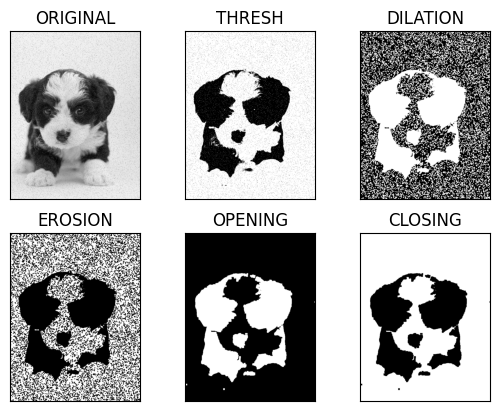

In [18]:
titles = ["ORIGINAL","THRESH","DILATION","EROSION","OPENING","CLOSING"]
images = [img,result,dilation,erosion,opening,closing]
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Convolution

IndexError: list index out of range

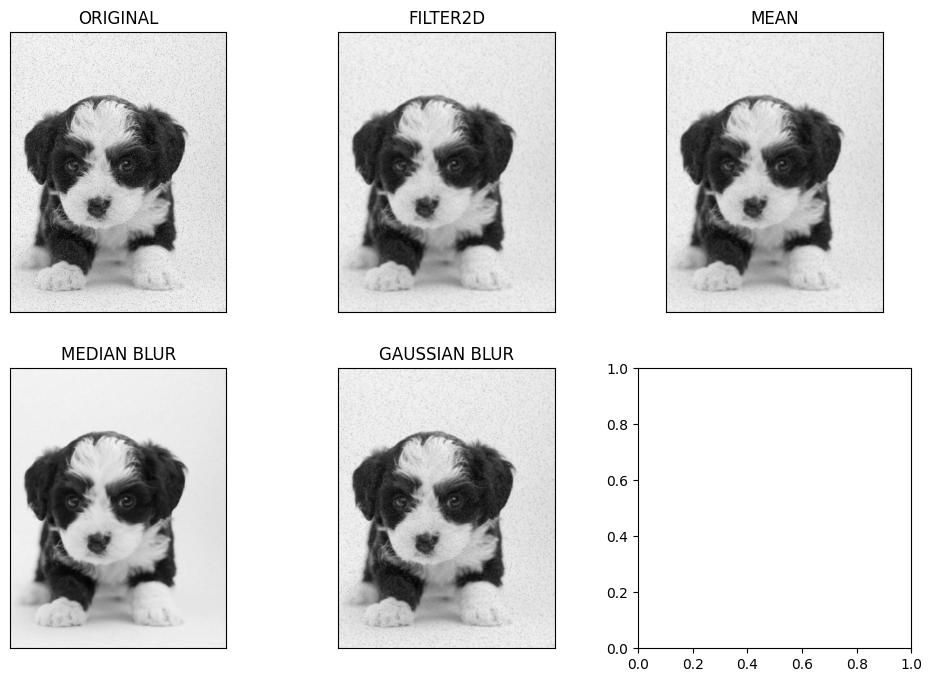

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# original image
img = cv2.imread("dog-noise.jpg")
# filter2d
filter2d = cv2.filter2D(img,-1,np.ones((5,5),np.float32)/25)
# blur
mean = cv2.blur(img,(5,5))
# median
mblur=cv2.medianBlur(img,5)
# Gaussian
gblur = cv2.GaussianBlur(img,(5,5),1)

titles = ["ORIGINAL","FILTER2D","MEAN","MEDIAN BLUR","GAUSSIAN BLUR"]
images = [img,filter2d,mean,mblur,gblur]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(titles[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

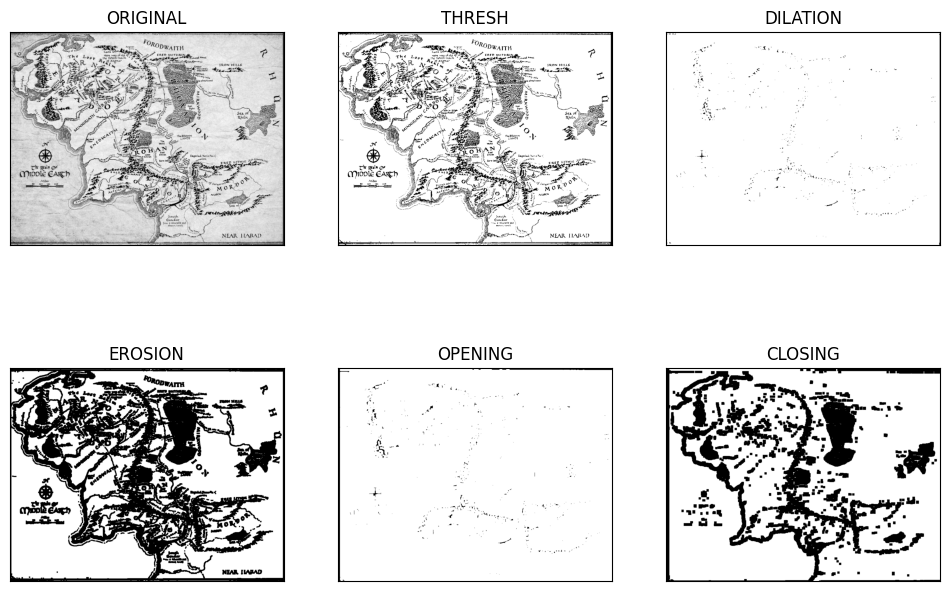

In [42]:
img = cv2.imread("map.png",0)
# img = cv2.cvtColor(cv2.COLOR_BGR2GRAY)

thresh , result = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
# thg, result = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,1)  
#  
kernel = np.ones((2,2), dtype=np.uint8)                 # kernel = 2x2 [[1,1], [1,1]]
# kernel = np.ones((3,3), dtype=np.uint8)                 # kernel = 3x3 [[1,1,1], [1,1,1], [1,1,1]]

# (1) Erosion
erosion = cv2.erode(result,kernel,iterations=3)

# (2) Dilation
dilation = cv2.dilate(result,kernel,iterations=3)

# (3) Opening 
opening = cv2.morphologyEx(dilation,cv2.MORPH_OPEN,kernel,iterations=5)

# (3) Closing
closing = cv2.morphologyEx(erosion,cv2.MORPH_CLOSE,kernel,iterations=7)

# gblur 
gblur = cv2.GaussianBlur(img,(5,5),1)

titles = ["ORIGINAL","THRESH","DILATION","EROSION","OPENING","CLOSING"]
images = [img,result,dilation,erosion,opening,closing]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap='gray')
    ax.set_title(titles[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [53]:

cv2.imshow("Original",img)
cv2.imshow("Erosion",erosion)
cv2.imshow("Dilation",dilation)
cv2.imshow("Opening",opening)
cv2.imshow("Closing",closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# gblur 
gblur = cv2.GaussianBlur(img,(5,5),1)

IndexError: list index out of range

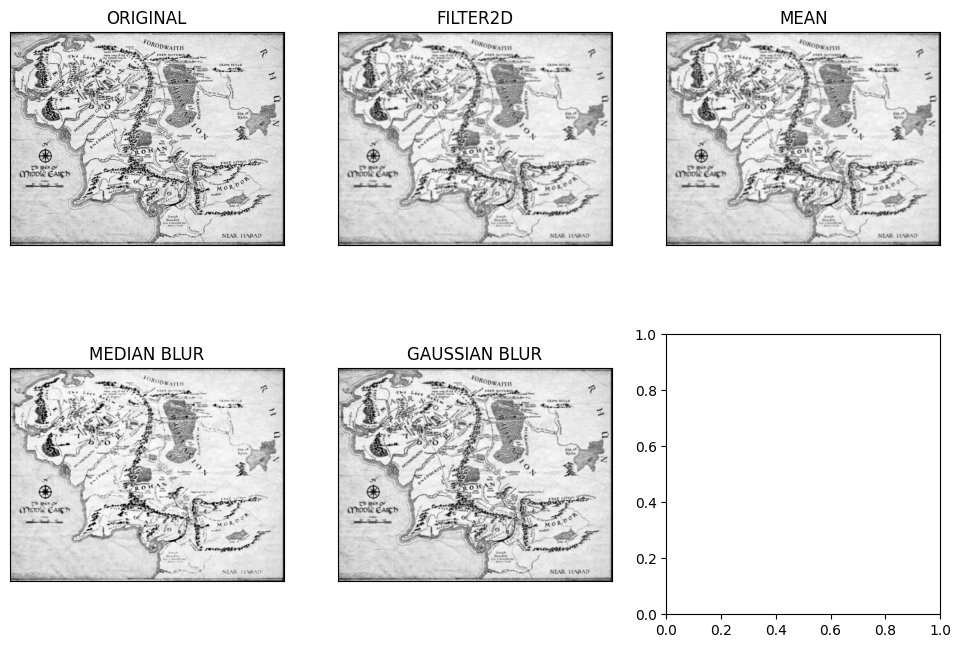

In [ ]:
filter2d = cv2.filter2D(img,-1,np.ones((5,5),np.float32)/25)
# blur
mean = cv2.blur(img,(5,5))
# median
mblur=cv2.medianBlur(img,5)
# Gaussian
gblur = cv2.GaussianBlur(img,(5,5),1)

titles = ["ORIGINAL","FILTER2D","MEAN","MEDIAN BLUR","GAUSSIAN BLUR"]
images = [img,filter2d,mean,mblur,gblur]

# fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(images[i],cmap='gray')
#     ax.set_title(titles[i])
#     ax.set_xticks([])
#     ax.set_yticks([])

# plt.tight_layout()
# plt.show()

In [ ]:
filter2d = cv2.filter2D(img,-1,np.ones((5,5),np.float32)/25)
# blur
mean = cv2.blur(img,(5,5))
# median
mblur=cv2.medianBlur(img,5)
# Gaussian
gblur = cv2.GaussianBlur(img,(5,5),1)


In [55]:

cv2.imshow("Original",img)
cv2.imshow("2D",filter2d)
cv2.imshow("MEAN",mean)
cv2.imshow("MB",mblur)
cv2.imshow("GB",gblur)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
gblur_erosion = cv2.erode(gblur,kernel,iterations=3)

gb_opening = cv2.morphologyEx(gblur_erosion,cv2.MORPH_OPEN,kernel,iterations=5)
gb_closing = cv2.morphologyEx(gblur_erosion,cv2.MORPH_CLOSE,kernel,iterations=7)


cv2.imshow("gb_erosion",gblur_erosion)
cv2.imshow("gb_opening",gb_opening)
cv2.imshow("gb_closing",gb_closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


try median => threshold